In [ ]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!ls -larth '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/heart.csv'
file_path = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\heart.csv'

import os.path
if os.path.exists(file_path) :
    print("Arquivo Existe")

Arquivo Existe


In [11]:
# Importando dados de Heart
import pandas as pd

#heart_csv = pd.read_csv('/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/heart.csv')
heart_csv = pd.read_csv(file_path)


In [12]:
print("Shape:",heart_csv.shape)
heart_csv.head(5)

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
heart_csv.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
heart_csv.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

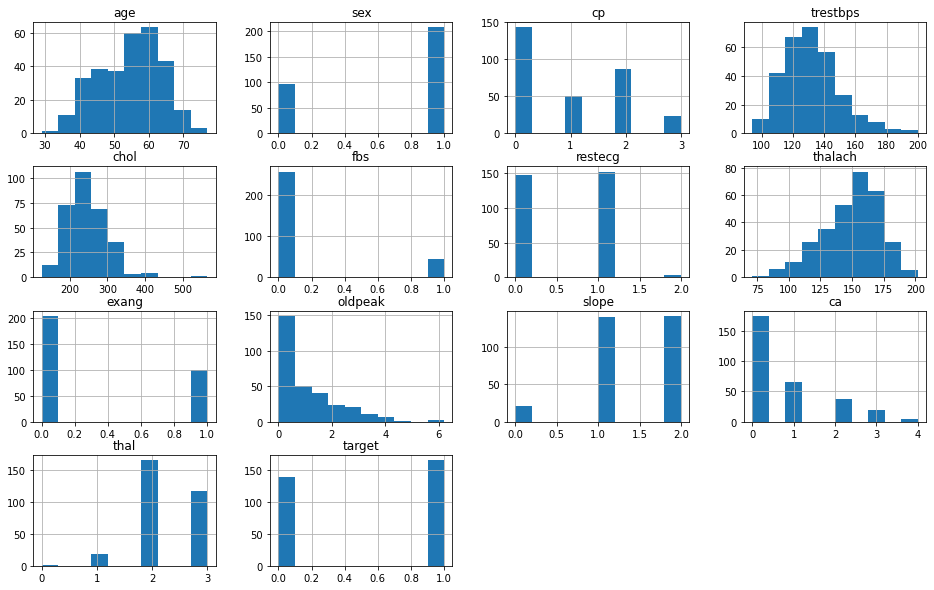

In [15]:
hist = heart_csv.hist(bins=10, figsize=(16,10))

In [16]:
# Separando dados em X e Y
X= heart_csv.drop('target',axis=1).to_numpy()
Y= heart_csv['target'].to_numpy()
print(X.shape, Y.shape, heart_csv.columns)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 0 )

(303, 13) (303,) Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
modelo = Sequential()
modelo.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
modelo.add(Dense(activation = "relu", units = 13, 
                     kernel_initializer = "uniform"))
modelo.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
modelo.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 112       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                117       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [19]:
print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
type(X_train)

Shape X_train: (212, 13)
Shape X_test: (91, 13)
Shape y_train: (212,)
Shape y_test: (91,)


numpy.ndarray

In [20]:
modelo.fit(X_train , y_train ,epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 709us/step - loss: 0.6929 - accuracy: 0.5283
Epoch 2/100
7/7 [==============================] - 0s 570us/step - loss: 0.6922 - accuracy: 0.5566
Epoch 3/100
7/7 [==============================] - 0s 570us/step - loss: 0.6911 - accuracy: 0.5613
Epoch 4/100
7/7 [==============================] - 0s 570us/step - loss: 0.6895 - accuracy: 0.6226
Epoch 5/100
7/7 [==============================] - 0s 570us/step - loss: 0.6868 - accuracy: 0.7123
Epoch 6/100
7/7 [==============================] - 0s 573us/step - loss: 0.6830 - accuracy: 0.7877
Epoch 7/100
7/7 [==============================] - 0s 570us/step - loss: 0.6774 - accuracy: 0.8113
Epoch 8/100
7/7 [==============================] - 0s 570us/step - loss: 0.6699 - accuracy: 0.8255
Epoch 9/100
7/7 [==============================] - 0s 570us/step - loss: 0.6595 - accuracy: 0.8585
Epoch 10/100
7/7 [==============================] - 0s 427us/step - loss: 0.6457 - accuracy: 0.8538
Epoch 11/

In [21]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 665us/step - loss: 0.4277 - accuracy: 0.8352

accuracy: 83.52%


In [22]:
scores = modelo.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

7/7 [==============================] - 0s 427us/step - loss: 0.2764 - accuracy: 0.8962

accuracy: 89.62%
